# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [15]:
data.info()9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [16]:
data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [4]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data["flight_day"] = data["flight_day"].map(mapping)

In [18]:
data["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [19]:
"""data['DepartureAirport'] = data['route'].str[:3]
data['ArrivalAirport'] = data['route'].str[3:]

depart = sorted(data["DepartureAirport"].unique())
arrive = sorted(data["ArrivalAirport"].unique())

all_airport = depart + arrive
all_airport = sorted(set(all_airport))

print(all_airport)"""

'data[\'DepartureAirport\'] = data[\'route\'].str[:3]\ndata[\'ArrivalAirport\'] = data[\'route\'].str[3:]\n\ndepart = sorted(data["DepartureAirport"].unique())\narrive = sorted(data["ArrivalAirport"].unique())\n\nall_airport = depart + arrive\nall_airport = sorted(set(all_airport))\n\nprint(all_airport)'

In [20]:
#sorted(data["booking_origin"].unique())

In [5]:
data = pd.get_dummies(data, columns=['sales_channel', 'trip_type'], drop_first=True)
#data = data.drop('route', axis=1)
#data.describe()

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [22]:
data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,False,False,True
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,False,False,True
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,False,False,True
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,False,False,True
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,False,False,True


In [6]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder instance
label_encoder = LabelEncoder()

# Label encode the airport codes
data['Encoded_Airport'] = label_encoder.fit_transform(data['route'])

# Calculate mean target variable for each airport code
airport_target_mean = data.groupby('Encoded_Airport')['booking_complete'].mean()

# Map the mean values back to the original airport codes
data['Airport_Target_Mean'] = data['Encoded_Airport'].map(airport_target_mean)

# Now you have two new columns: Encoded_Airport and Airport_Target_Mean
data['BookingCountry_encoded'] = label_encoder.fit_transform(data['booking_origin'])

In [7]:
data = data.drop('route', axis=1)
data = data.drop('booking_origin', axis=1)
from sklearn.model_selection import train_test_split
# Feature Engineering: Create new features if necessary
# For example, you can combine 'flight_hour' and 'flight_day' into a single feature

data['flight_time'] = data['flight_hour'] + data['flight_day']
data = data.drop('flight_hour', axis=1)
data = data.drop('flight_day', axis=1)
# Encoding Categorical Variables: Use one-hot encoding

#data = pd.get_dummies(data, columns=['booking_origin'], drop_first=True)         #,'DepartureAirport','ArrivalAirport'

# Define features (X) and target (y)
X = data.drop('booking_complete', axis=1)
y = data['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
data.head()

,num_passengers,purchase_lead,length_of_stay,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,Encoded_Airport,Airport_Target_Mean,BookingCountry_encoded,flight_time
0,2,262,19,1,0,0,5.52,0,False,False,True,0,0.0,61,13
1,1,112,20,0,0,0,5.52,0,False,False,True,0,0.0,61,9
2,2,243,22,1,1,0,5.52,0,False,False,True,0,0.0,36,20
3,1,96,31,0,0,1,5.52,0,False,False,True,0,0.0,61,10
4,2,68,22,1,0,1,5.52,0,False,False,True,0,0.0,36,18


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      8520
           1       0.54      0.18      0.27      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.58      0.59     10000
weighted avg       0.82      0.86      0.82     10000



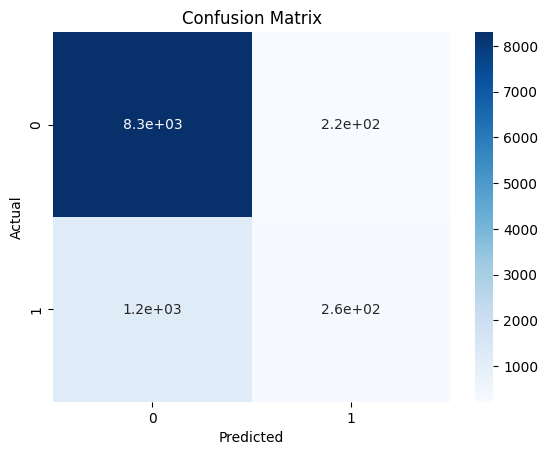

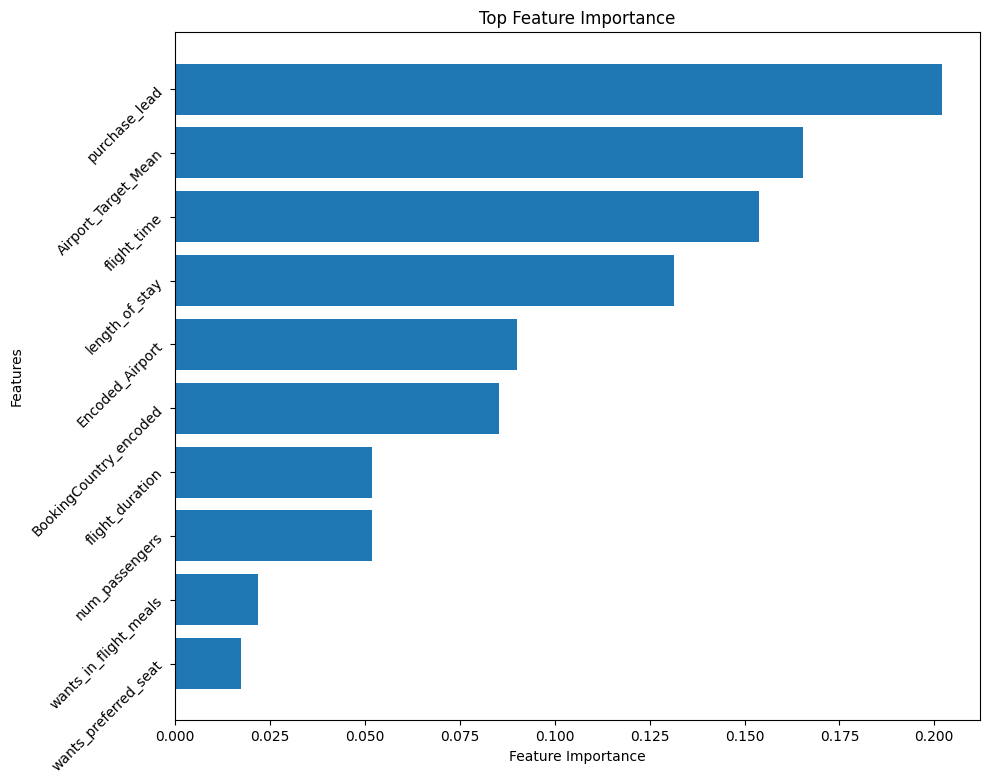

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the testing data
y_pred = model.predict(X_test)

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
output_path = 'Confusion Matrix.png'
plt.savefig(output_path, dpi=300)
plt.show()

# Feature Importance: Visualize how each variable contributed to the model
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()

# Increase the figure size
plt.figure(figsize=(10, 8))

# Display only the top N features
num_features = 10  # Change this to the desired number of top features
plt.barh(range(num_features), feature_importance[sorted_idx][-num_features:], align='center')

# Rotate y-axis labels by 45 degrees
plt.yticks(range(num_features), X.columns[sorted_idx][-num_features:], rotation=45)

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top Feature Importance')
plt.tight_layout()  # To ensure proper spacing
output_path = 'Feature Importance.png'
plt.savefig(output_path, dpi=300)
plt.show()

In [29]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already preprocessed your data and separated features and labels
X = data.drop('booking_complete', axis=1)
y = data['booking_complete']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Instantiate the RandomOverSampler and RandomUnderSampler
over_sampler = RandomOverSampler(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)

# Apply the sampling techniques to the training data
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# Train a classifier using the original data
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)

# Train a classifier using the oversampled data
clf_over = RandomForestClassifier(random_state=42)
clf_over.fit(X_train_over, y_train_over)
y_pred_over = clf_over.predict(X_test)

# Train a classifier using the undersampled data
clf_under = RandomForestClassifier(random_state=42)
clf_under.fit(X_train_under, y_train_under)
y_pred_under = clf_under.predict(X_test)

# Print classification reports to compare the models
print("Original Data:")
print(classification_report(y_test, y_pred_original))

print("Oversampled Data:")
print(classification_report(y_test, y_pred_over))

print("Undersampled Data:")
print(classification_report(y_test, y_pred_under))


Original Data:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     10648
           1       0.53      0.18      0.26      1852

    accuracy                           0.85     12500
   macro avg       0.70      0.57      0.59     12500
weighted avg       0.82      0.85      0.82     12500

Oversampled Data:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     10648
           1       0.44      0.29      0.35      1852

    accuracy                           0.84     12500
   macro avg       0.66      0.61      0.63     12500
weighted avg       0.82      0.84      0.83     12500

Undersampled Data:
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     10648
           1       0.30      0.75      0.43      1852

    accuracy                           0.70     12500
   macro avg       0.62      0.72      0.62     12500
weighted avg       0.8